<a href="https://colab.research.google.com/github/bbanana502/Colab_AI/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub #코랩 라이브러리 호출

path = kagglehub.dataset_download("emmarex/plantdisease") #안의 데이터셋을 임시데이터로 다운로드받은 후 압축 해제

print("Path to dataset files:", path) # 경로 확인

Using Colab cache for faster access to the 'plantdisease' dataset.
Path to dataset files: /kaggle/input/plantdisease


In [2]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pathlib #딥러닝에 필요한 라이브러리 호출

data_dir = pathlib.Path('/kaggle/input/plantdisease')

print("데이터셋 경로:", data_dir)

데이터셋 경로: /kaggle/input/plantdisease


In [3]:

IMG_HEIGHT = 180
IMG_WIDTH = 180
BATCH_SIZE = 32

#읽어들이기
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, #데이터 분할로 검증용 데이터 만듬
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)


class_names = train_ds.class_names
print("\n총 클래스 수:", len(class_names))
print("클래스 이름:", class_names)

Found 41276 files belonging to 2 classes.
Using 33021 files for training.
Found 41276 files belonging to 2 classes.
Using 8255 files for validation.

총 클래스 수: 2
클래스 이름: ['PlantVillage', 'plantvillage']


In [4]:
# 3-1. 실제 클래스 폴더가 있을 것으로 예상되는 'PlantVillage' 내부 확인

import os
import pathlib

# 데이터셋 경로
base_path = '/kaggle/input/plantdisease'

# 'PlantVillage' 폴더 경로 설정 (대문자 사용)
plant_village_path = pathlib.Path(base_path) / 'PlantVillage'

print(f"'{plant_village_path}' 폴더 내용:")
# 이 명령어는 이제 실제 클래스 이름(예: Apple_scab, Healthy 등)을 출력해야 합니다.
print(os.listdir(plant_village_path))

'/kaggle/input/plantdisease/PlantVillage' 폴더 내용:
['Pepper__bell___Bacterial_spot', 'Potato___healthy', 'Tomato_Leaf_Mold', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Early_blight', 'Tomato__Target_Spot', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Tomato_Late_blight', 'Potato___Early_blight', 'Tomato__Tomato_mosaic_virus']


In [5]:
# 4-1. 정확한 경로로 데이터셋 로드 및 분할 설정

import tensorflow as tf
from tensorflow import keras

# 정확한 데이터셋 경로 (PlantVillage 폴더 내부)
data_dir_corrected = '/kaggle/input/plantdisease/PlantVillage'

# 이미지 크기 및 배치 크기 정의 (이전과 동일)
IMG_HEIGHT = 180
IMG_WIDTH = 180
BATCH_SIZE = 32

# 1. 학습 데이터셋 로드 (전체의 80%)
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_corrected,
  validation_split=0.2, # 20%를 검증용으로 사용
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

# 2. 검증 데이터셋 로드 (전체의 20%)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_corrected,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

# 클래스 이름 확인
class_names = train_ds.class_names
print("\n✨ 최종 클래스 수:", len(class_names))
print("✨ 최종 클래스 이름:", class_names)

Found 20638 files belonging to 15 classes.
Using 16511 files for training.
Found 20638 files belonging to 15 classes.
Using 4127 files for validation.

✨ 최종 클래스 수: 15
✨ 최종 클래스 이름: ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


In [6]:
# 5-1. 정규화 레이어 적용 (수정된 코드)
import tensorflow as tf
from tensorflow.keras import layers # <--- 여기서 layers를 가져옴

# 이전 단계에서 로드된 train_ds와 val_ds를 사용합니다.

# 픽셀 값을 255로 나누어 0~1 범위로 정규화하는 레이어 정의
# layers.Rescaling은 이제 layers 모듈 안에 있습니다.
normalization_layer = layers.Rescaling(1./255)

# 학습 데이터셋과 검증 데이터셋에 정규화 레이어를 적용
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

print("데이터셋 정규화 완료 (픽셀 값: 0 -> 0~1)")

데이터셋 정규화 완료 (픽셀 값: 0 -> 0~1)


In [7]:
# 5-2. 데이터 로드 최적화 (성능 향상)
AUTOTUNE = tf.data.AUTOTUNE

train_ds_optimized = normalized_train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds_optimized = normalized_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("데이터 파이프라인 최적화 완료.")

데이터 파이프라인 최적화 완료.


In [8]:
# 6-1. 데이터 증강 레이어 정의 (재실행)
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

IMG_HEIGHT = 180
IMG_WIDTH = 180

data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# 8-1. CNN 모델 구조 수정 (Rescaling 레이어 제거)

# 참고: 단계 6-1의 data_augmentation과 num_classes는 그대로 사용합니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf

num_classes = len(train_ds.class_names) # 15개 클래스

model = Sequential([
  # 1. 데이터 증강 레이어 적용
  data_augmentation,

  # 2. 불필요한 정규화 레이어 제거됨! (5-1에서 이미 정규화 되었기 때문)

  # 3. 합성곱(Conv) 및 풀링(Pooling) 블록
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  # 4. 평탄화 및 완전 연결층
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes)
])

# 모델 컴파일은 이전과 동일
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,990,575 (15.22 MB)

 Trainable params: 3,990,575 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 📌 저장된 가중치 파일 로드 코드

# 체크포인트 파일 경로 설정
checkpoint_filepath = '/content/drive/MyDrive/plant_disease_model/best_model_weights.h5'

# NOTE: 이 코드를 실행하기 전에 'model' 변수(모델 구조)가 먼저 정의되어 있어야 합니다.

# 저장된 가중치 파일을 로드
model.load_weights(checkpoint_filepath)
print("✨ 체크포인트 가중치 로드 완료! 모델을 바로 사용할 수 있습니다.")

In [10]:
# 📌 ModelCheckpoint 설정 및 효율적인 20 Epoch 학습

from tensorflow.keras.callbacks import ModelCheckpoint
import os

# 모델 가중치 저장 경로 설정 (가장 좋은 모델의 가중치가 저장될 파일 경로)
checkpoint_filepath = '/content/drive/MyDrive/plant_disease_model/best_model_weights.h5'

# 저장 디렉토리 생성 확인 (필수)
checkpoint_dir = os.path.dirname(checkpoint_filepath)
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# ModelCheckpoint 콜백 정의
# monitor='val_accuracy': 검증 정확도를 기준으로 저장 여부 판단
# mode='max': val_accuracy가 '최대'일 때 저장
# save_best_only=True: 가장 좋은 성능일 때만 덮어쓰기
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

# 모델 학습 실행 (분석 결과에 따른 최적 20 에포크 사용)
# NOTE: train_ds_optimized와 val_ds_optimized가 메모리에 정의되어 있어야 합니다.
history = model.fit(
    train_ds_optimized,
    validation_data=val_ds_optimized,
    epochs=20,
    callbacks=[model_checkpoint_callback] # 콜백 추가
)

print(f"\n✨ 가장 성능이 좋았던 모델 가중치({checkpoint_filepath})가 Google Drive에 저장되었습니다.")

Epoch 1/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3594 - loss: 2.0247

516/516 ━━━━━━━━━━━━━━━━━━━━ 49s 86ms/step - accuracy: 0.3597 - loss: 2.0240 - val_accuracy: 0.7235 - val_loss: 0.8964
Epoch 2/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.6446 - loss: 1.0809 - val_accuracy: 0.6358 - val_loss: 1.2481
Epoch 3/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7165 - loss: 0.8515

516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.7165 - loss: 0.8514 - val_accuracy: 0.8350 - val_loss: 0.4886
Epoch 4/20
514/516 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7663 - loss: 0.7080

516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.7663 - loss: 0.7079 - val_accuracy: 0.8476 - val_loss: 0.4931
Epoch 5/20
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7963 - loss: 0.6185

516/516 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.7963 - loss: 0.6184 - val_accuracy: 0.8881 - val_loss: 0.3645
Epoch 6/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8114 - loss: 0.5676 - val_accuracy: 0.8612 - val_loss: 0.4403
Epoch 7/20
515/516 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8296 - loss: 0.5151

516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.8296 - loss: 0.5151 - val_accuracy: 0.8956 - val_loss: 0.3235
Epoch 8/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8337 - loss: 0.5025 - val_accuracy: 0.8924 - val_loss: 0.3498
Epoch 9/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8496 - loss: 0.4436

516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8496 - loss: 0.4436 - val_accuracy: 0.9009 - val_loss: 0.3113
Epoch 10/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8548 - loss: 0.4324 - val_accuracy: 0.8914 - val_loss: 0.3529
Epoch 11/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8650 - loss: 0.4028 - val_accuracy: 0.8861 - val_loss: 0.3722
Epoch 12/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8665 - loss: 0.3702 - val_accuracy: 0.8767 - val_loss: 0.4106
Epoch 13/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8801 - loss: 0.3651 - val_accuracy: 0.8898 - val_loss: 0.3460
Epoch 14/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8810 - loss: 0.3459

516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8810 - loss: 0.3459 - val_accuracy: 0.9108 - val_loss: 0.2863
Epoch 15/20
514/516 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8879 - loss: 0.3285

516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.8879 - loss: 0.3285 - val_accuracy: 0.9435 - val_loss: 0.1992
Epoch 16/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8858 - loss: 0.3424 - val_accuracy: 0.9234 - val_loss: 0.2788
Epoch 17/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8949 - loss: 0.3161

516/516 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.8949 - loss: 0.3161 - val_accuracy: 0.9448 - val_loss: 0.1768
Epoch 18/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.8970 - loss: 0.2995 - val_accuracy: 0.9421 - val_loss: 0.1960
Epoch 19/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9002 - loss: 0.2983 - val_accuracy: 0.9285 - val_loss: 0.2350
Epoch 20/20
516/516 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.8975 - loss: 0.3084 - val_accuracy: 0.9217 - val_loss: 0.2610

✨ 가장 성능이 좋았던 모델 가중치(/content/drive/MyDrive/plant_disease_model/best_model_weights.h5)가 Google Drive에 저장되었습니다.


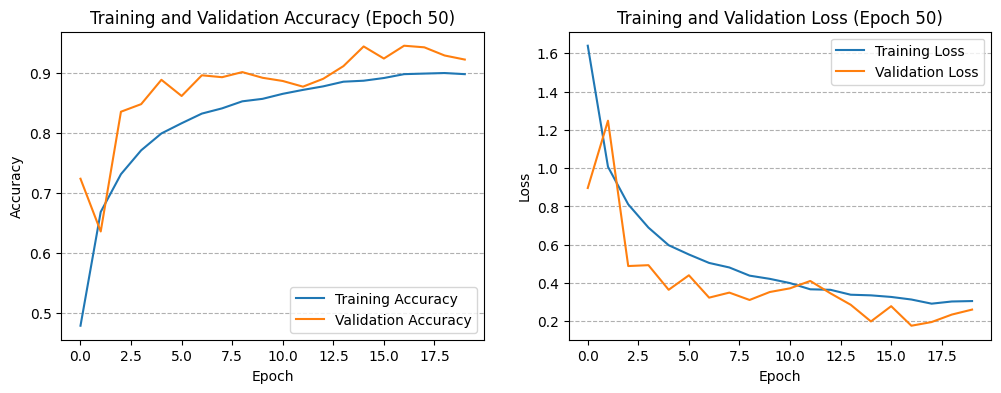

In [11]:
# 📌 단계 11: 정확도 및 손실 시각화 코드

import matplotlib.pyplot as plt

# history 객체가 있는지 확인 후 실행
if 'history' in locals():
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))

    # --- 첫 번째 그래프: 정확도 변화 ---
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy (Epoch 50)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(axis='y', linestyle='--')

    # --- 두 번째 그래프: 손실 변화 ---
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss (Epoch 50)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(axis='y', linestyle='--')

    plt.show()
else:
    print("🚨 오류: 'history' 객체를 찾을 수 없습니다. model.fit() 코드를 먼저 실행하여 학습 기록을 저장해야 합니다.")

In [12]:
# 9-1. Google Drive 마운트 확인 및 모델 저장 (최종 수정 코드)

from google.colab import drive
import tensorflow as tf
import os

# Google Drive 마운트 (이미 되어 있으므로 빠르게 진행)
drive.mount('/content/drive', force_remount=True)

# 모델을 저장할 경로 설정 (확장자 포함)
MODEL_FILE_PATH = '/content/drive/MyDrive/plant_disease_model/plant_classifier_v1.keras'

# 모델이 저장될 디렉토리 경로 추출
MODEL_DIR = os.path.dirname(MODEL_FILE_PATH)

# ✨ 해결 코드: 디렉토리가 없으면 생성 (recursive: 상위 폴더까지 한 번에 생성)
if not os.path.exists(MODEL_DIR):
    os.makedirs(MODEL_DIR)
    print(f"저장 디렉토리가 생성되었습니다: {MODEL_DIR}")

# 모델 저장
model.save(MODEL_FILE_PATH)

print(f"\n✨ 모델이 Google Drive에 성공적으로 저장되었습니다: {MODEL_FILE_PATH}")

Mounted at /content/drive

✨ 모델이 Google Drive에 성공적으로 저장되었습니다: /content/drive/MyDrive/plant_disease_model/plant_classifier_v1.keras


In [13]:
# 10-1. 모델 로드 및 예측 함수 정의

import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# (1) 저장된 모델 로드
# 저장된 경로를 사용합니다.
MODEL_FILE_PATH = '/content/drive/MyDrive/plant_disease_model/plant_classifier_v1.keras'
loaded_model = tf.keras.models.load_model(MODEL_FILE_PATH)
print("✨ 모델 로드 완료!")

# (2) 이미지 예측에 필요한 클래스 이름 및 크기 설정
class_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
IMG_HEIGHT = 180
IMG_WIDTH = 180

def predict_new_image(img_path):
    """지정된 이미지 경로의 파일을 로드하여 모델로 예측합니다."""
    # 이미지 로드 및 크기 조정
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)

    # 배치 차원 추가 및 정규화 (모델이 학습된 방식과 동일하게 0~1로 정규화)
    img_array = tf.expand_dims(img_array / 255.0, 0)

    # 예측 수행
    predictions = loaded_model.predict(img_array)
    # 예측 확률 변환 (모델의 출력을 실제 확률로)
    score = tf.nn.softmax(predictions[0])

    # 결과 해석
    predicted_class_index = np.argmax(score)
    predicted_class_name = class_names[predicted_class_index]
    confidence = np.max(score) * 100

    print("-" * 30)
    print(f"이미지 경로: {img_path}")
    print(f"✅ 예측된 클래스: {predicted_class_name}")
    print(f"   확률: {confidence:.2f}%")
    print("-" * 30)

✨ 모델 로드 완료!


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [18]:
import os

# 현재 디렉토리 파일 목록 출력
print("현재 디렉토리(/content/) 파일 목록:")
print(os.listdir('/content/'))

현재 디렉토리(/content/) 파일 목록:
['.config', '.ipynb_checkpoints', 'drive', 'testcase.jpg', 'sample_data']


In [19]:
import os

# 파일 경로 설정
file_path = 'testcase.jpg'

if os.path.exists(file_path):
    print(f"✅ 파일이 현재 경로에 존재합니다: {os.path.abspath(file_path)}")
else:
    print(f"❌ 파일이 현재 경로에 없습니다. 코랩 좌측 '파일' 탭을 확인하거나, 파일명이 정확한지 확인하세요.")

✅ 파일이 현재 경로에 존재합니다: /content/testcase.jpg


In [20]:
# 10-2. 예측 실행 코드

# !!! Step A에서 저장한 파일명(testcase.jpg)을 사용합니다. !!!
TEST_IMAGE_FILENAME = 'testcase.jpg'

# 예측 함수 호출
try:
    # 이전에 실행한 10-1 코드에서 로드된 모델로 예측을 수행합니다.
    predict_new_image(TEST_IMAGE_FILENAME)
except FileNotFoundError:
    print(f"🚨 오류: '{TEST_IMAGE_FILENAME}' 파일을 코랩 좌측 파일 탭에 먼저 업로드해야 합니다!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
------------------------------
이미지 경로: testcase.jpg
✅ 예측된 클래스: Pepper__bell___healthy
   확률: 100.00%
------------------------------


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


/tmp/ipython-input-3763593357.py:61: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3763593357.py:61: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3763593357.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3763593357.py:61: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3763593357.py:61: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3763593357.py:61: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3763593357.py:61: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython

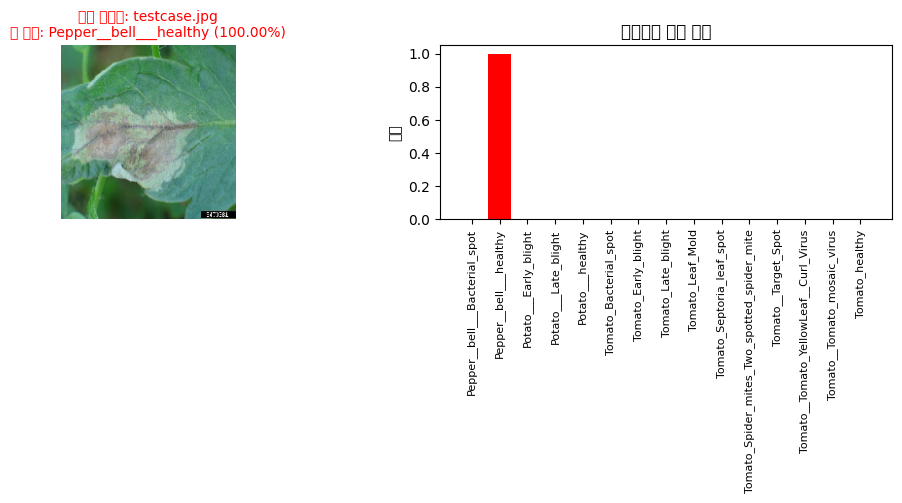

In [22]:
# 📌 단계 12: 최종 예측 결과 시각화 (testcase.jpg 사용)

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np
import os

# --- 기본 설정 ---
# 사용자가 예측을 실행한 파일명으로 설정
TEST_IMAGE_FILENAME = 'testcase.jpg'
MODEL_FILE_PATH = '/content/drive/MyDrive/plant_disease_model/plant_classifier_v1.keras'
class_names = ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']
IMG_HEIGHT = 180
IMG_WIDTH = 180

# (1) 모델 로드
try:
    loaded_model = tf.keras.models.load_model(MODEL_FILE_PATH)
except:
    print("모델 로드에 실패하여 현재 메모리의 학습 모델(model)을 사용합니다.")
    # 'model' 변수가 정의되어 있다고 가정
    loaded_model = model


def visualize_prediction(img_path):
    """테스트 이미지와 예측 확률 막대 그래프를 함께 표시합니다."""

    # 1. 이미지 전처리
    img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_tensor = tf.expand_dims(img_array / 255.0, 0)

    # 2. 예측 수행
    predictions = loaded_model.predict(img_tensor)
    score = tf.nn.softmax(predictions[0])
    predicted_class_index = np.argmax(score)
    confidence = np.max(score) * 100

    # 3. 시각화 준비
    plt.figure(figsize=(10, 5))

    # --- 좌측: 입력 이미지 ---
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    # 100% 오분류이므로 빨간색으로 경고 표시
    plt.title(f"입력 이미지: {img_path}\n❌ 예측: {class_names[predicted_class_index]} ({confidence:.2f}%)",
              fontsize=10, color='red')
    plt.axis('off')

    # --- 우측: 예측 확률 막대 그래프 ---
    plt.subplot(1, 2, 2)
    bar_colors = ['skyblue'] * len(class_names)
    bar_colors[predicted_class_index] = 'red'

    plt.bar(class_names, score.numpy(), color=bar_colors)
    plt.ylabel("확률")
    plt.title("클래스별 예측 확률")
    plt.xticks(rotation=90, fontsize=8)

    plt.tight_layout()
    plt.show()

# 최종 시각화 실행
try:
    visualize_prediction(TEST_IMAGE_FILENAME)
except FileNotFoundError:
    print(f"🚨 오류: '{TEST_IMAGE_FILENAME}' 파일을 코랩 좌측 파일 탭에 먼저 업로드해야 합니다!")
except NameError:
    print("🚨 오류: 'loaded_model' 변수가 정의되지 않아 예측을 수행할 수 없습니다. 모델 로드 단계를 확인하세요.")